# Pyber Data Analysis

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Take in raw data and read it into pandas
city_data_df = pd.read_csv("raw_data/city_data.csv")
ride_data_df = pd.read_csv("raw_data/ride_data.csv")

In [3]:
# Merge the two datasets on "city"
data_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


## Ride Sharing Data Analysis

In [4]:
# Count average fare per city
fare_city = data_df.groupby(["city"])["fare"].mean()

# Count number of rides per city
rides_city = data_df.groupby(["city"])["ride_id"].count()

# Count number of drivers per city
drivers_city = data_df.groupby(["city"])["driver_count"].mean()

# Identify the city type of each city
types_city = data_df.groupby(["city"])["type"].unique()
types_city.head()


city
Alvarezhaven       [Urban]
Alyssaberg         [Urban]
Anitamouth      [Suburban]
Antoniomouth       [Urban]
Aprilchester       [Urban]
Name: type, dtype: object

In [5]:
# Before creating the scatter plot, assign the colors to each city type
colors =[]
for x in types_city:
    if (x == "Urban"):
        color = "Lightcoral"
    elif (x == "Suburban"):
        color = "Lightblue"
    else:
        color = "Gold"
    colors.append(color)

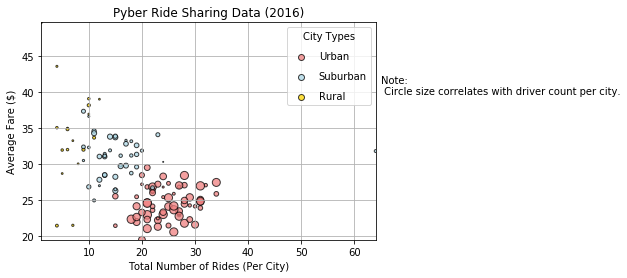

In [6]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(rides_city, fare_city, marker="o", c=colors, edgecolors="black", \
            linewidth = 1, s=drivers_city, alpha=0.75,label=None)

# Since the default legend of above scatter chart does not indicate city types, I build a new legend on an empty chart
legend_colors ={"Urban":"Lightcoral","Suburban":"Lightblue","Rural":"Gold"}

for types_city, legend_color in legend_colors.items():
   plt.scatter([],[], c=legend_color, edgecolors='black', linewidths=1,\
               alpha=0.75,label=types_city) 

plt.legend(scatterpoints=1, labelspacing=1, title='City Types')

# Set the grid in default
plt.grid(True)

# Set the y limits of the scatter plot
plt.ylim(min(fare_city), max(fare_city))

# Set the x limits of the scatter plot
plt.xlim(min(rides_city), max(rides_city))

# Create a title, x label, and y label for the plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Leave a note to specify the circle size variables
plt.text((max(rides_city)+1), max(fare_city)-10, \
         "Note:"+"\n"+" Circle size correlates with driver count per city.")

#plt.savefig("Pyber Ride Sharing Data.png")
plt.show()

## Findings:
* Average Fare ($) is negatively correlated with number of rides. The more rides per city, the less fare cost.
* Driver number is positively correlated with number of rides. The more rides, the more drivers per city.
* Driver number is negatively correlated with average fare. The more drivers, the less fare cost.


## Limitations:
* As shown in the Scatter Plot, an abnormal data set shows extremely high total number of rides.
* By digging in the raw data, I found that a city "Port James" has two sets of data with different driver count. This causes its total number of rides being calculated twice in two data sets.
* A student T-test might be adopted to further decide whether to drop or merge the data.

## Total Fares by City Type

C:\Users\cheun\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


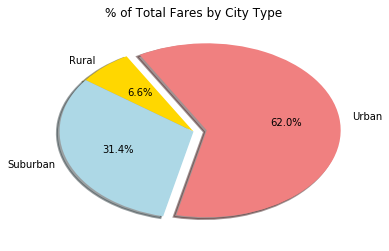

In [7]:
# Count Total Fare by city types
fare_type = data_df.groupby(["type"])["fare"].sum()

fare_type_chart = fare_type.plot(kind='pie', title= "% of Total Fares by City Type",explode = (0,0,0.1),
                                 colors=["Gold", "Lightblue", "lightcoral"], autopct="%1.1f%%",
                                 shadow=True, startangle=120,  wedgeprops = {'linewidth': 2})

# Since the default pie chart contains labels that is not necessary required, I rewrite the empty labels
plt.axes().set_xlabel('')
plt.axes().set_ylabel('')

#plt.savefig("")
plt.show()



## Total Rides by City Type

C:\Users\cheun\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


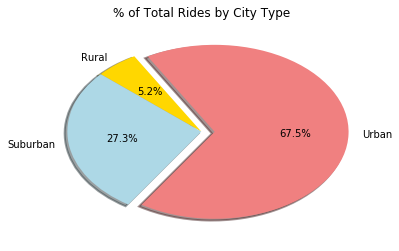

In [8]:
Rides_type = data_df.groupby(["type"])["ride_id"].count()

Rides_type_chart = Rides_type.plot(kind='pie', title= "% of Total Rides by City Type",explode = (0,0,0.1),
                                 colors=["Gold", "Lightblue", "lightcoral"], autopct="%1.1f%%",
                                 shadow=True, startangle=120,  wedgeprops = {'linewidth': 2}, )

# Since the default pie chart contains labels that is not necessary required, I rewrite the empty labels
plt.axes().set_xlabel('')
plt.axes().set_ylabel('')

#plt.savefig("")
plt.show()


## Total Drivers by City Type

C:\Users\cheun\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


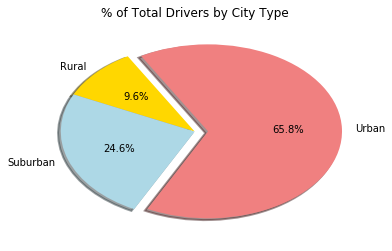

In [9]:
drivers_type = data_df.groupby(["type"])["driver_count"].mean ()

drivers_chart = drivers_type.plot(kind='pie', title= "% of Total Drivers by City Type",explode = (0,0,0.1),
                                 colors=["Gold", "Lightblue", "lightcoral"], autopct="%1.1f%%",
                                 shadow=True, startangle=120,  wedgeprops = {'linewidth': 2}, )

# Since the default pie chart contains labels that is not necessary required, I rewrite the empty labels
plt.axes().set_xlabel('')
plt.axes().set_ylabel('')

#plt.savefig("")
plt.show()

## Findings: 
* Urban area has the highest total number of rides and drivers number, also the lowest fare, followed by suburaban area and rural area.
* Urban covers more than half of the Pyber business. More specifically, Urban contribute to 62% of total Fares, 68% of total rides and 66% of total drivers.

## Limitations: 
* In this Analysis, Total Drivers number is counted as the average driver count of the same city. However, this is based on the assumption that the same city has exact same driver counts. In reality, "Port James" city has two different driver counts. This can cause inaccurate Suburban data.   